# What I am trying to find out

In my opinion one of the most important questions is the general Happiness in Life and how does it correlate to external factors. So I tried to have a look at three relationships according to happiness.

How does happines relate to other job factors like education and time spend at work or flexibility at work?

# The Dataset(s)

As a basis I used a dataset of the ESS (European Social Studies) which questions people all over Europe. The same questions where asked  between 2002 and 2018 every two years. I took all countries into account that participated in every study, which are Belgium, Finland, France, Germany, Hungary, Ireland, Netherlands, Norway, Poland, Portugal, Slovenia, Spain, Sweden, Switzerland, Uk.

Two have comparisons between the countries, also the annual GDP per capita und inflation rate were taken into account.

ESS from https://www.europeansocialsurvey.org/downloadwizard/

GDP per Capita: https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?end=2020&start=2003&view=map

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from import_prep import file_importer

list_of_countries = ['Belgium', 'Finland', 'France', 'Germany', 'Hungary', 'Ireland', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom']

#importing data with helper function

ess_pp1, _, _, _, _ = file_importer(list_of_countries)

At first I will have a look at the education and its distribution:

In [20]:
# Drop rows that did not contain a valid answer

ess_edu = ess_pp1.dropna(subset=['Highest education Norm'])
ess_happy = ess_pp1.drop(ess_pp1[ess_pp1['Happiness'] > 10].index)
ess_happy_edu = ess_pp1.drop(ess_pp1[ess_pp1['Happiness'] > 10].index).dropna(subset=['Highest education Norm'])

edu_levels = ['ES-ISCED I', 'ES-ISCED II', 'ES-ISCED IIIb', 'ES-ISCED IIIa', 'ES-ISCED IV', 'ES-ISCED V1', 'ES-ISCED V2' ]
#calculate percantage that answered the questions

percentage_no_answer_edu = (1 - (ess_edu.shape[0] / ess_pp1.shape[0])) * 100
percentage_no_answer_happy = (1 - (ess_happy.shape[0] / ess_pp1.shape[0])) * 100
percentage_no_answer_happy_edu = (1 - (ess_happy_edu.shape[0] / ess_pp1.shape[0])) * 100

print('%.2f%% did not answer the education question' %percentage_no_answer_edu)
print('%.2f%% did not answer the happiness question' %percentage_no_answer_happy)
print('%.2f%% did not answer the happiness or education question' %percentage_no_answer_happy_edu)



16.73% did not answer the education question
0.33% did not answer the happiness question
16.98% did not answer the happiness or education question


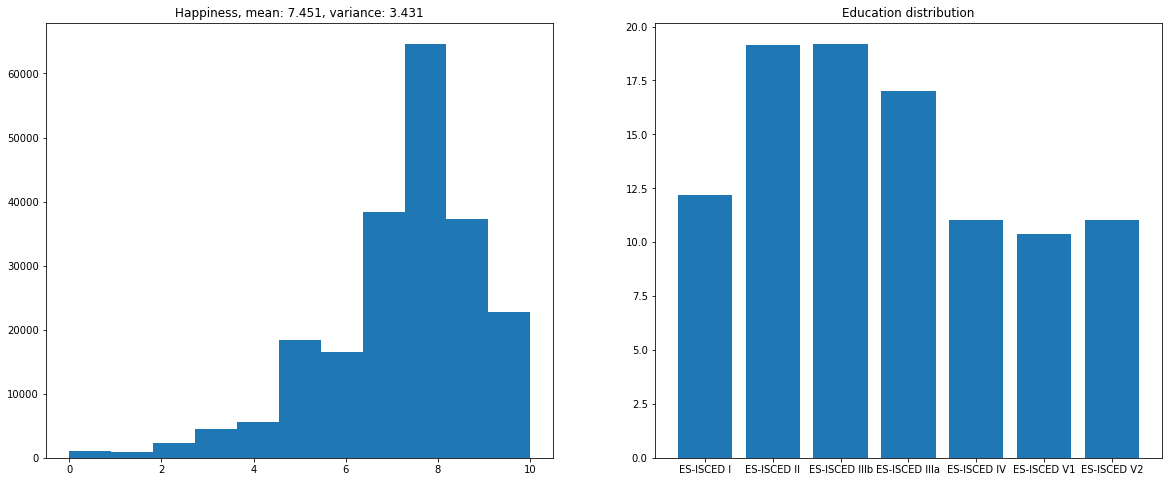

In [21]:
# Get basic statistics data

mean_happy = ess_happy_edu['Happiness'].mean()
var_happy = ess_happy_edu['Happiness'].var()

edu_distribution = ess_happy_edu['Highest education Norm'].value_counts()
edu_data = []
for level in edu_levels:
    edu_data.append(edu_distribution[level] / ess_happy_edu.shape[0] * 100)
    
# Plot
fig1, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize= [20,8])
ax1.hist(ess_happy_edu['Happiness'], bins=11)
ax1.title.set_text('Happiness, mean: %.3f, variance: %.3f' %(mean_happy, var_happy))
ax2.bar(edu_levels, edu_data)
ax2.set_title('Education distribution')
import matplotlib.ticker as mtick


The education levels seem to vary a lot, with mean at the middle education levels.

Now I will have a closer look at the means and variances for each education group:

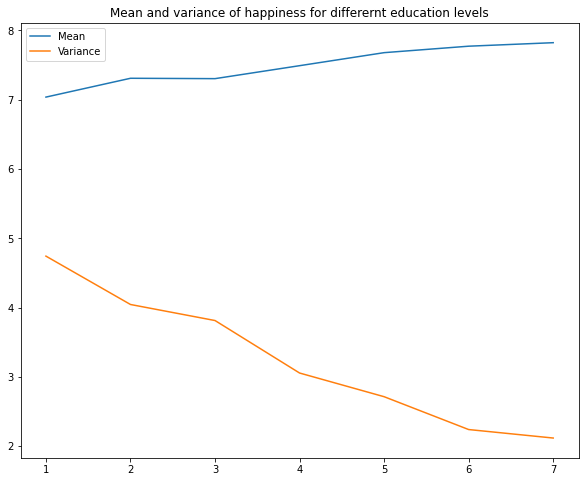

In [22]:
means = []
variances = []

for level in edu_levels:
    means.append(ess_happy_edu[ess_happy_edu['Highest education Norm'] == level]['Happiness'].mean())
    variances.append(ess_happy_edu[ess_happy_edu['Highest education Norm'] == level]['Happiness'].var())
    
# Plot
fig1, ax1 = plt.subplots(1,1, figsize= [10,8])
ax1.plot(list(range(8))[1:], means, label='Mean')
ax1.plot(list(range(8))[1:], variances, label='Variance')
ax1.set_title('Mean and variance of happiness for differernt education levels')
ax1.legend()

In [23]:
# Drop rows that did not contain a valid answer

max_hours = 100

ess_worktime = ess_pp1.drop(ess_pp1[ess_pp1['Time at work'] > max_hours].index)
ess_happy = ess_pp1.drop(ess_pp1[ess_pp1['Happiness'] > 10].index)
ess_happy_worktime = ess_pp1.drop(ess_pp1[(ess_pp1['Happiness'] > 10) | (ess_pp1['Time at work'] > max_hours)].index)


#calculate percantage that answered the questions

percentage_no_answer_worktime = (1 - (ess_worktime.shape[0] / ess_pp1.shape[0])) * 100
percentage_no_answer_happy_worktime = (1 - (ess_happy_worktime.shape[0] / ess_pp1.shape[0])) * 100

print('%.2f%% did not answer the worktime question' %percentage_no_answer_worktime)
print('%.2f%% did not answer the happiness or worktime question' %percentage_no_answer_happy_worktime)


13.59% did not answer the worktime question
13.81% did not answer the happiness or worktime question


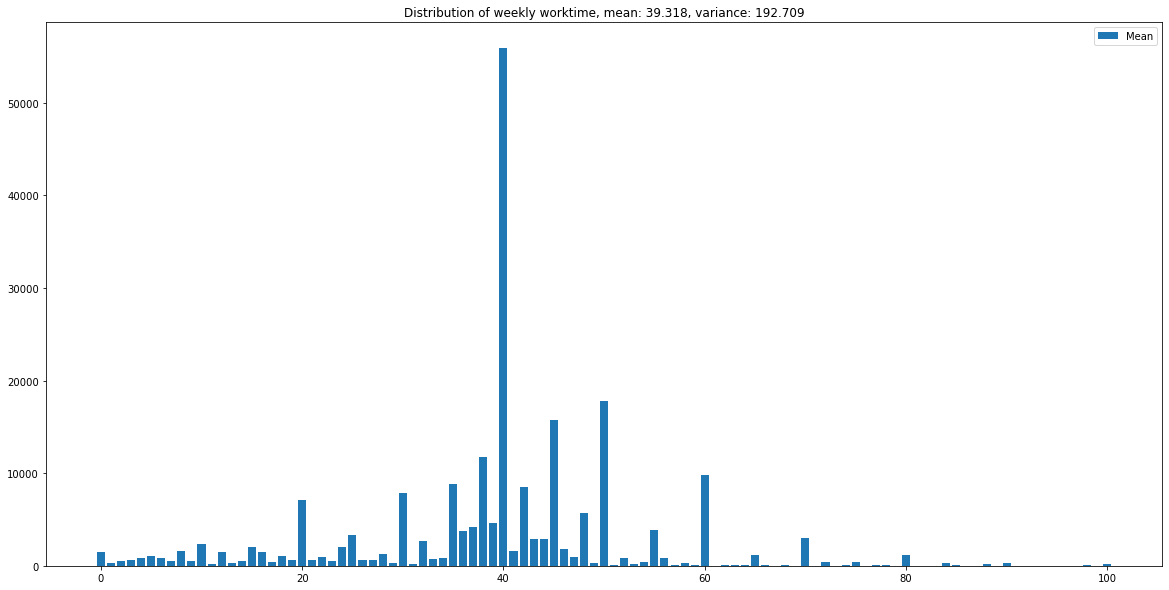

In [24]:
worktime_distribution = ess_happy_worktime['Time at work'].value_counts().sort_index()

# Getting mean and variance

mean = sum(list(worktime_distribution.values * worktime_distribution.index)) / sum(worktime_distribution.values)
sum_quadratic_diff = 0
for i in range(len(worktime_distribution.index)):
    sum_quadratic_diff = sum_quadratic_diff + ((worktime_distribution.index[i] - mean)**2 * worktime_distribution.values[i])
    
var = sum_quadratic_diff / sum(worktime_distribution.values)
fig1, ax1 = plt.subplots(1,1, figsize= [20,10])
ax1.bar(worktime_distribution.index, worktime_distribution.values, label='Mean')
ax1.set_title('Distribution of weekly worktime, mean: %.3f, variance: %.3f' %(mean, var))
ax1.legend()

Text(0.5, 1.0, 'Distribution of weekly worktime clustered')

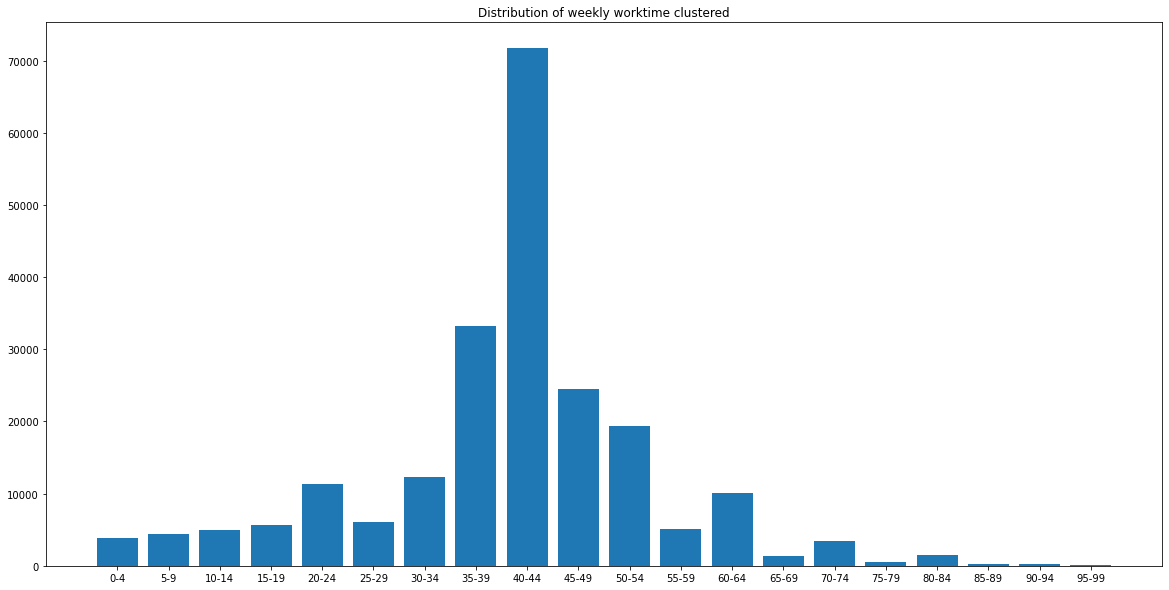

In [25]:
bins = 20
len(worktime_distribution)
worktime_distribution_shrinked = []
wt_groups = []

for i in range(bins):
    worktime_distribution_shrinked.append(sum(worktime_distribution[(worktime_distribution.index >= i*max_hours/bins)
                                                                & (worktime_distribution.index < (i+1)*max_hours/bins)]))
    wt_groups.append('%i-%i'%(i*max_hours/bins, (i+1)*max_hours/bins-1))
    

worktime_distribution_shrinked
fig1, ax1 = plt.subplots(1,1, figsize= [20,10])
ax1.bar(wt_groups, worktime_distribution_shrinked)
ax1.set_title('Distribution of weekly worktime clustered')

In [26]:
# Putting the data into bins of 5h width

work_time_stacked = []

for i in range(max(ess_happy_worktime.index) + 1):
    found = False
    try:
        for j in range(bins):
            if ess_happy_worktime['Time at work'][i] < (j+1)*max_hours/bins:
                found=True
                work_time_stacked.append(wt_groups[j])
                break
        if not found:
            work_time_stacked.append(np.nan)
    except:
        continue

ess_happy_worktime['Work time stacked'] = work_time_stacked
ess_happy_worktime = ess_happy_worktime.dropna(subset=['Work time stacked'])



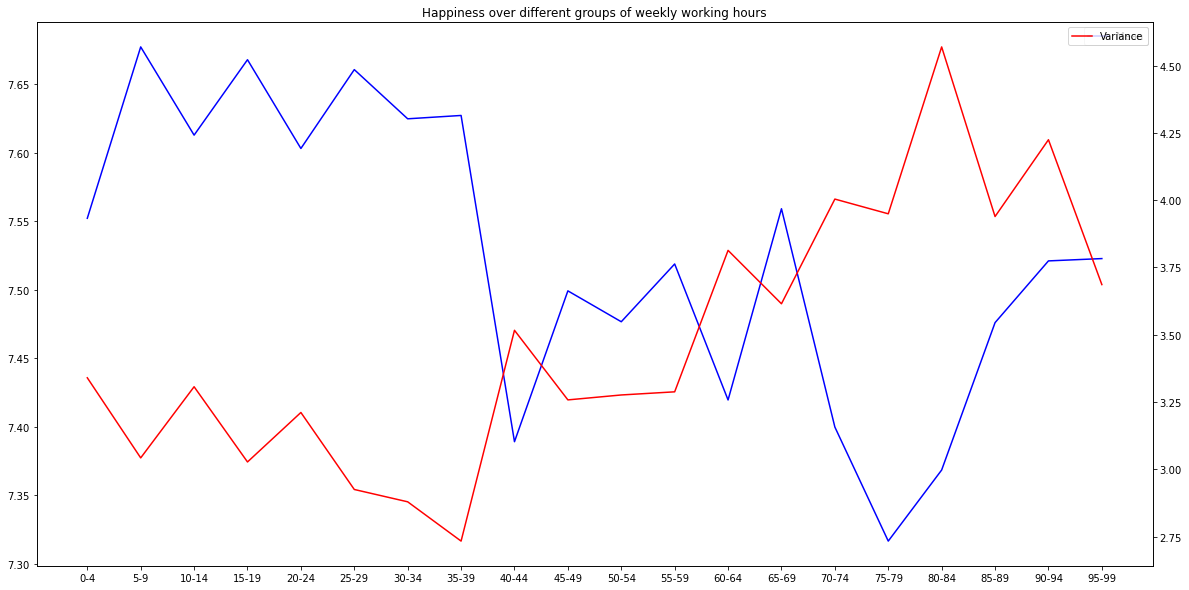

In [27]:
# Calculate men and variance for each bin

mean_work_happ = []
var_work_hap = []

for wt_group in wt_groups:
    mean_work_happ.append(ess_happy_worktime[ess_happy_worktime['Work time stacked'] == wt_group]['Happiness'].mean())
    var_work_hap.append(ess_happy_worktime[ess_happy_worktime['Work time stacked'] == wt_group]['Happiness'].var())
    

# Plot
    
fig1, ax1 = plt.subplots(1,1, figsize= [20,10])
ax1.plot(wt_groups, mean_work_happ, label='Mean', color='blue')
ax1.legend()
ax2=ax1.twinx()
ax2.plot(wt_groups, var_work_hap, label='Variance', color='red')
ax2.set_title('Happiness over different groups of weekly working hours')
ax2.legend()

It seems like there is a certain relation between working hours and happiness, but its rather boolean. People who work more than 40 hours a week seem to be a bit less happy than those who work less. But the difference is rather small. In general it seems to have a lot less affect than e.g. income.

Next I will look at the employment status:

In [28]:
# Drop rows that did not contain a valid answer

ess_emp_rel = ess_pp1.dropna(subset=['Employment Relation'])
ess_happy_emp_rel = ess_pp1.drop(ess_pp1[ess_pp1['Happiness'] > 10].index).dropna(subset=['Employment Relation'])


# calculate percantage that did not answered the questions

percentage_no_answer_emp_rel = (1 - (ess_emp_rel.shape[0] / ess_pp1.shape[0])) * 100
percentage_no_answer_happy_emp_rel = (1 - (ess_happy_emp_rel.shape[0] / ess_pp1.shape[0])) * 100

print('%.2f%% did not answer the employment relation question' %percentage_no_answer_emp_rel)
print('%.2f%% did not answer the happiness or employment relation question' %percentage_no_answer_happy_emp_rel)


10.45% did not answer the employment relation question
10.72% did not answer the happiness or employment relation question


Text(0.5, 1.0, 'Distribution of employment status')

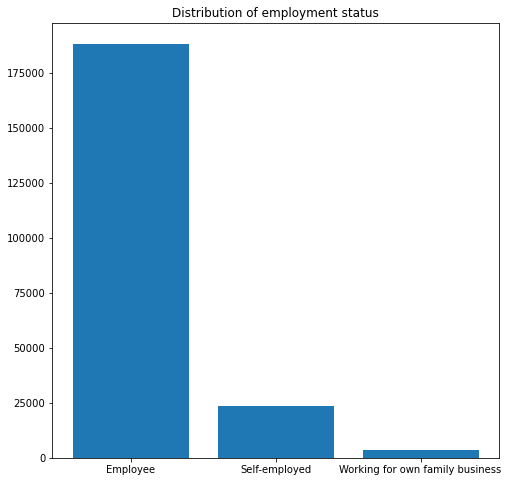

In [29]:
emp_rel_distribution = ess_happy_worktime['Employment Relation'].value_counts()

fig1, ax1 = plt.subplots(1,1, figsize= [8,8])
ax1.bar(emp_rel_distribution.index, emp_rel_distribution.values)
ax1.set_title('Distribution of employment status')

Text(0.5, 1.0, 'Mean and variance of happiness for different employment relations')

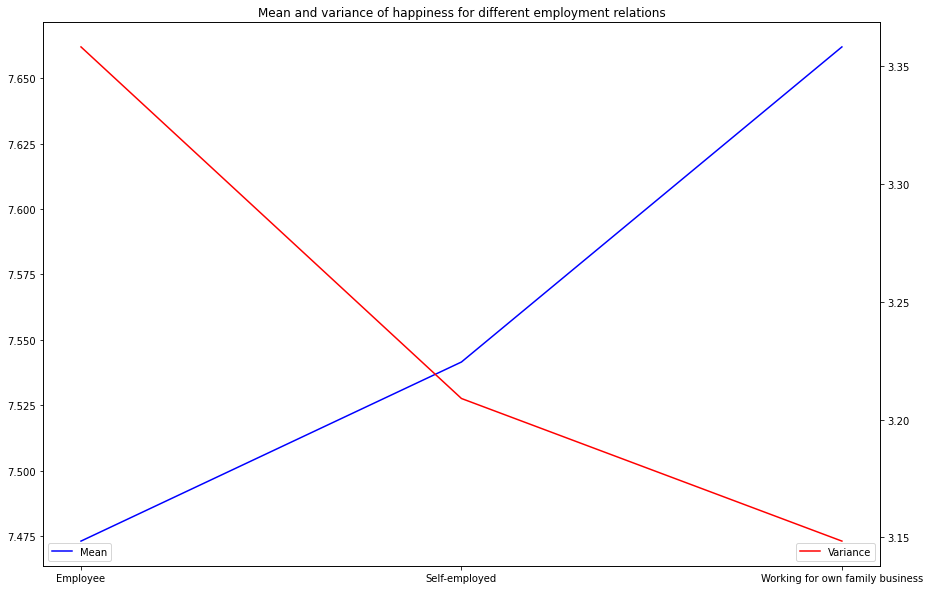

In [30]:
emp_rels = ess_happy_emp_rel['Employment Relation'].unique()

# Calculate mean and variance for each employment relation

mean_emp_rel_happ = []
var_emp_rel_hap = []

for status in emp_rels:
    mean_emp_rel_happ.append(ess_happy_emp_rel[ess_happy_emp_rel['Employment Relation'] == status]['Happiness'].mean())
    var_emp_rel_hap.append(ess_happy_emp_rel[ess_happy_emp_rel['Employment Relation'] == status]['Happiness'].var())
    
# Plot

fig1, ax1 = plt.subplots(1,1, figsize= [15,10])
ax1.plot(emp_rels, mean_emp_rel_happ, color='blue', label='Mean')
ax1.legend(loc='lower left')
ax2=ax1.twinx()
ax2.plot(emp_rels, var_emp_rel_hap, color='red', label='Variance')
ax2.legend(loc='lower right')
ax2.set_title('Mean and variance of happiness for different employment relations')

The employment status seems to be "equally unimportant" as the working hours. Although people who are working for own family businesses or are self employed seem in average to be a little happier than those who are employees.

Now I will have a look what influence on happiness the levl of self organization has:


In [31]:
# Drop rows that did not contain a valid answer

ess_self_org = ess_pp1.drop(ess_pp1[ess_pp1['Self organize work 2-9'] > 10].index).dropna(subset=['Self organize work 2-9'])
ess_happy_self_org = ess_pp1.drop(ess_pp1[(ess_pp1['Happiness'] > 10) | (ess_pp1['Self organize work 2-9'] > 10)].index).dropna(subset=['Self organize work 2-9'])


#calculate percantage that answered the questions

percentage_no_answer_self_org = (1 - (ess_self_org.shape[0] / ess_pp1.shape[0])) * 100
percentage_no_answer_happy_self_org = (1 - (ess_happy_self_org.shape[0] / ess_pp1.shape[0])) * 100

print('%.2f%% did not answer the self organize work relation question' %percentage_no_answer_self_org)
print('%.2f%% did not answer the happiness or self organize work question' %percentage_no_answer_happy_self_org)

19.61% did not answer the self organize work relation question
19.83% did not answer the happiness or self organize work question


Text(0.5, 1.0, 'Distribution of self organizing at work (0 no control, 10 full control)')

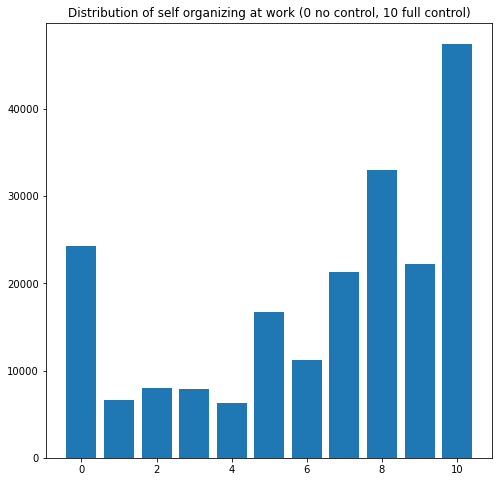

In [32]:
self_org_distribution = ess_happy_self_org['Self organize work 2-9'].value_counts()

# Plot distribution of level of  self organization

fig1, ax1 = plt.subplots(1,1, figsize= [8,8])
ax1.bar(self_org_distribution.index, self_org_distribution.values)
ax1.set_title('Distribution of self organizing at work (0 no control, 10 full control)')

I have to admit I did not expect this. The level of freedom people have at work looks quite high with a maximum at 10. Now I will have a look at how that relates to happiness

Text(0.5, 1.0, 'Mean and variance of happiness depending on level of self organization at work')

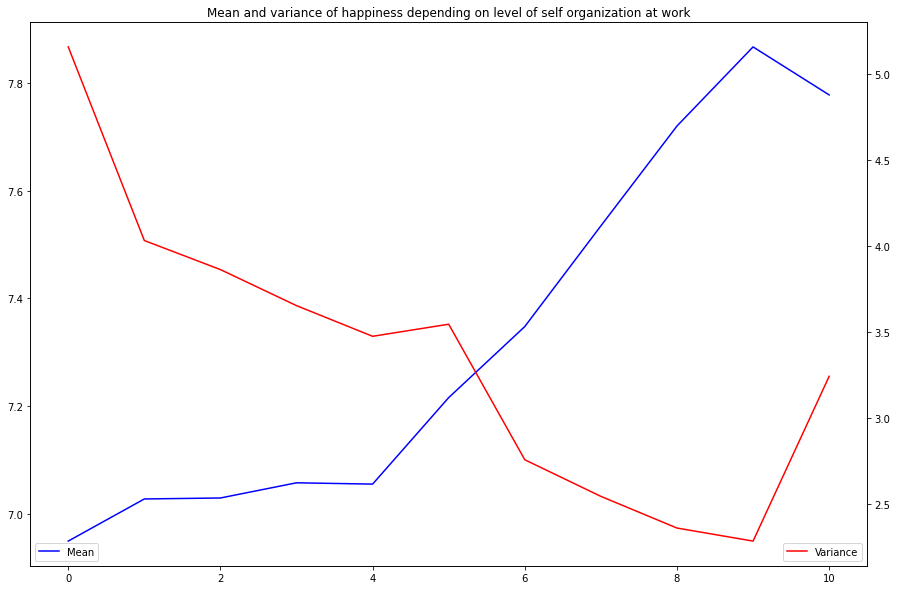

In [33]:
self_org_values = ess_happy_self_org['Self organize work 2-9'].unique()

# Calculate mean and variance of happiness for each level of self organization

mean_self_org_happ = []
var_self_org_hap = []

for org_level in range(11):
    mean_self_org_happ.append(ess_happy_self_org[ess_happy_self_org['Self organize work 2-9'] == org_level]['Happiness'].mean())
    var_self_org_hap.append(ess_happy_self_org[ess_happy_self_org['Self organize work 2-9'] == org_level]['Happiness'].var())
    
# Plot 

fig1, ax1 = plt.subplots(1,1, figsize= [15,10])
ax1.plot(range(11), mean_self_org_happ, color='blue', label='Mean')
ax1.legend(loc='lower left')
ax2=ax1.twinx()
ax2.plot(range(11), var_self_org_hap, color='red', label='Variance')
ax2.legend(loc='lower right')
ax2.set_title('Mean and variance of happiness depending on level of self organization at work')

It looks like, that the more freedom people have at work the happier they are in average. Again for the variance of happiness the opposite is true. The only exception is the large group of people who say that they have full control. Its the only level where people on average are less happy than on a lower level of freedom.

# First conclusion

Looking at different work factors, it can be stated that for all of them there seems to be a relation to happiness.
In general, the higher the education, the happier people are, the higher the level of self organization, the happier people are. Working more than 40 hours makes less happy than working less than 40 hours a week.

Nevertheless all of these factors, especially the working hours per week, in average seem to have less of an impact than the income. The range of the mean differnce is approximatly as high as the differnce within the upper 2/3 of the income groups.

Last I will have a look at how income correlates with education and self organization:


Text(0.5, 1.0, 'Mean and variance of income depending on level of self organization at work')

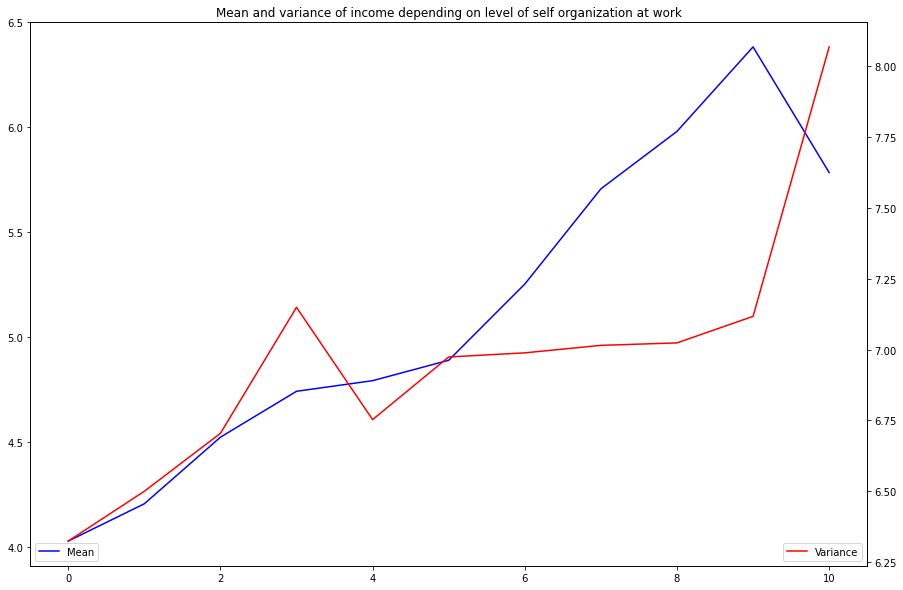

In [34]:
ess_inc_self_org = ess_pp1.drop(ess_pp1[(ess_pp1['Self organize work 2-9'] > 10) | (ess_pp1['Net income 4-9'] > 10)].index).dropna(subset=['Self organize work 2-9']).dropna(subset=['Net income 4-9'])

# Calculate mean and variance of income for each level of self organization

self_org_values = ess_happy_self_org['Self organize work 2-9'].unique()

mean_self_org_inc = []
var_self_org_inc = []

for org_level in range(11):
    mean_self_org_inc.append(ess_inc_self_org[ess_inc_self_org['Self organize work 2-9'] == org_level]['Net income 4-9'].mean())
    var_self_org_inc.append(ess_inc_self_org[ess_inc_self_org['Self organize work 2-9'] == org_level]['Net income 4-9'].var())
    
# Plot

fig1, ax1 = plt.subplots(1,1, figsize= [15,10])
ax1.plot(range(11), mean_self_org_inc, color='blue', label='Mean')
ax1.legend(loc='lower left')
ax2=ax1.twinx()
ax2.plot(range(11), var_self_org_inc, color='red', label='Variance')
ax2.legend(loc='lower right')
ax2.set_title('Mean and variance of income depending on level of self organization at work')

As it looks like, people with a higher income usually have more control of their job. Also with the exception of people with thw highest level of self organization. There also the variance is extremly high, so there seem to be quite a few persons who have full control but a rather low income. Maybe those are artist, musicans or others with a rather irregular job / income

Text(0.5, 1.0, 'Mean and variance of income depending on education level')

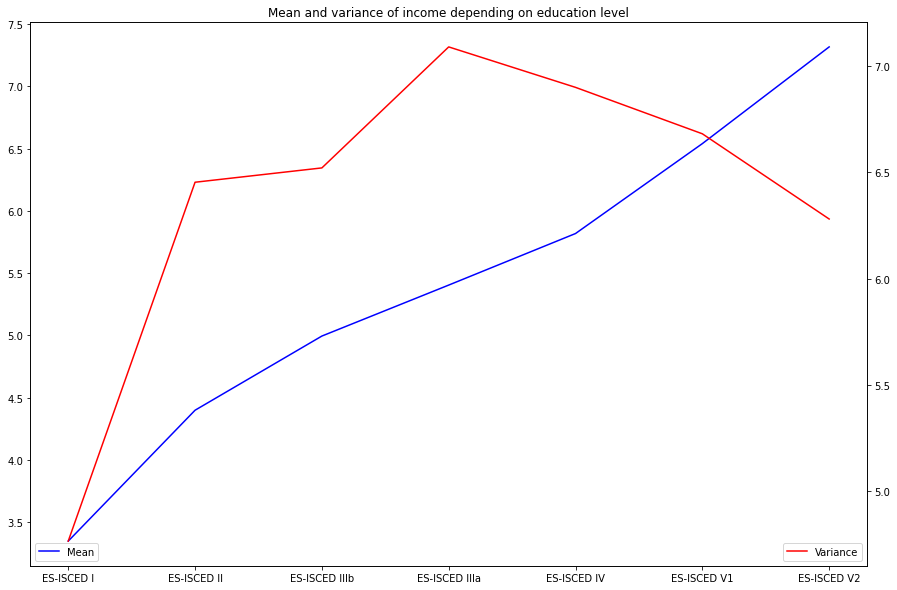

In [35]:
ess_inc_edu = ess_pp1.drop(ess_pp1[ess_pp1['Net income 4-9'] > 10].index).dropna(subset=['Highest education Norm']).dropna(subset=['Net income 4-9'])

# Calculate mean and variance of income for each level of education

mean_edu_inc = []
var_edu_inc = []

for edu_level in edu_levels:
    mean_edu_inc.append(ess_inc_edu[ess_inc_edu['Highest education Norm'] == edu_level]['Net income 4-9'].mean())
    var_edu_inc.append(ess_inc_edu[ess_inc_edu['Highest education Norm'] == edu_level]['Net income 4-9'].var())
    
# Plot 

fig1, ax1 = plt.subplots(1,1, figsize= [15,10])
ax1.plot(edu_levels, mean_edu_inc, color='blue', label='Mean')
ax1.legend(loc='lower left')
ax2=ax1.twinx()
ax2.plot(edu_levels, var_edu_inc, color='red', label='Variance')
ax2.legend(loc='lower right')
ax2.set_title('Mean and variance of income depending on education level')

The relation between income and education is even stronger than income and level of self organization. Whats interesting in those two relations is, that the mean as well as the variance are getting bigger. Which means, that a low level of education or self organization very often mean a low income, but a higher level does not necessarily mean a high income.

# Conclusion

In general happiness definetly depends on work matters. The most important role is played by the income. A higher income goes along with an higher average happiness. The same is true for higher education or a higher level of self organization at work. The problem is, that all of them are correlated in the same direction, so its hard to tell which of them has the actual biggest influence and which is just a sideaffect. 

Nevertheless looking at the total income over all different countries, the general state of the economy seems to have not much influence on the happiness of people. Above ~$30k to $35k gdp per capita there does not seem to much of an influence anymore. So above this thresholf considering the income it seems to be a lot more important what you got in comparison to others than what you totally got.

What really surprised me is, that the amount of hours worked per week seem to have only a very slim influence on peoples happiness. Above 40 seems a bit worse than up to 40, but compared to other factors the influence can rather be neglected.
